## Triplet Model for Hampback Whole Prediction

---
<h4 style="text-align:Left;">Outline of the Notebook</h4>

---
* [**1.Introduction**](#1.Introduction)
* [**2.Data Description**](#2.Data-Description)
* [**3.Evaluation**](#3.Evaluation)
* [**4.Submission Format**](#4.Submission-Format)
* [**5.Required Packages**](#5.Required-Packages)
* [**6.Define Parameter**](#6.Define-Parameter)
* [**7.Helping Function**](#7.Helping-Function)
* [**8.Introduction to Triplet Loss**](#8.Introduction-to-Triplet-Loss)
* [**9.Model Design**](#9.Model-Design)
* [**10.Model Training**](#10.Model-Training)
* [**11.Image Generator**](#11.Image-Generator)
* [**12.Predict Result**](#12.Predict-Result)

## 1.Introduction

#### About Competition
<div class="competition-overview__content"><div><div class="markdown-converter__text--rendered"><p><img width="250" style="float: right;" alt="Planet Aerial Imagery" src="https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/happy-whale.jpg"></p>
<p style="text-align:justify;">After centuries of intense whaling, recovering whale populations still have a hard time adapting to warming oceans and struggle to compete every day with the industrial fishing industry for food.</p>
<p style="text-align:justify;">To aid whale conservation efforts, scientists use photo surveillance systems to monitor ocean activity. They use the shape of whales’ tails and unique markings found in footage to identify what species of whale they’re analyzing and meticulously log whale pod dynamics and movements. For the past 40 years, most of this work has been done manually by individual scientists, leaving a huge trove of data untapped and underutilized.</p>
<p style="text-align:justify;">In this competition, you’re challenged to build an algorithm to identify individual whales in images. You’ll analyze Happywhale’s database of over 25,000 images, gathered from research institutions and public contributors. By contributing, you’ll help to open rich fields of understanding for marine mammal population dynamics around the globe.</p>
<p style="text-align:justify;"><b>Note, this competition is similar in nature to <a href="https://www.kaggle.com/c/whale-categorization-playground" rel="nofollow">this competition </a> with an expanded and updated dataset. </p>
 </b></p></div></div></div>
 
 ## 2.Data Description
 
 <div class="markdown-content-box__converter"><div class="markdown-converter__text--rendered competition-data__content"><p>This training data contains thousands of images of humpback whale flukes. Individual whales have been identified by researchers and given an <code>Id</code>. The challenge is to predict the whale <code>Id</code> of images in the test set. What makes this such a challenge is that there are only a few examples for each of 3,000+ whale Ids.</p>

<h3>File descriptions</h3>

<ul>
<li><strong>train.zip</strong> - a folder containing the training images</li>
<li><strong>train.csv</strong> - maps the training <code>Image</code> to the appropriate whale <code>Id</code>. Whales that are not predicted to have a label identified in the training data should be labeled as <code>new_whale</code>.</li>
<li><strong>test.zip</strong> - a folder containing the test images to predict the whale <code>Id</code></li>
<li><strong>sample_submission.csv</strong> - a sample submission file in the correct format</li>
</ul></div></div>

## 3.Evalution Mertics:

<div class="markdown-converter__text--rendered"><p>Submissions are evaluated according to the Mean Average Precision @ 5 (MAP@5):</p>

<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span tabindex="0" class="MathJax" id="MathJax-Element-1-Frame" role="presentation" style="text-align: center; position: relative;" data-mathml='<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>M</mi><mi>A</mi><mi>P</mi><mrow class="MJX-TeXAtom-ORD"><mo>@</mo></mrow><mn>5</mn><mo>=</mo><mfrac><mn>1</mn><mi>U</mi></mfrac><munderover><mo>&amp;#x2211;</mo><mrow class="MJX-TeXAtom-ORD"><mi>u</mi><mo>=</mo><mn>1</mn></mrow><mrow class="MJX-TeXAtom-ORD"><mi>U</mi></mrow></munderover><munderover><mo>&amp;#x2211;</mo><mrow class="MJX-TeXAtom-ORD"><mi>k</mi><mo>=</mo><mn>1</mn></mrow><mrow class="MJX-TeXAtom-ORD"><mi>m</mi><mi>i</mi><mi>n</mi><mo stretchy="false">(</mo><mi>n</mi><mo>,</mo><mn>5</mn><mo stretchy="false">)</mo></mrow></munderover><mi>P</mi><mo stretchy="false">(</mo><mi>k</mi><mo stretchy="false">)</mo></math>'><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 15.86em; display: inline-block;"><span style="width: 12.99em; height: 0px; font-size: 122%; display: inline-block; position: relative;"><span style="left: 0em; top: -2.16em; position: absolute; clip: rect(0.12em, 1012.9em, 3.55em, -1000em);"><span class="mrow" id="MathJax-Span-2"><span class="mi" id="MathJax-Span-3" style="font-family: MathJax_Math; font-style: italic;">M<span style="width: 0.08em; height: 1px; overflow: hidden; display: inline-block;"></span></span><span class="mi" id="MathJax-Span-4" style="font-family: MathJax_Math; font-style: italic;">A</span><span class="mi" id="MathJax-Span-5" style="font-family: MathJax_Math; font-style: italic;">P<span style="width: 0.1em; height: 1px; overflow: hidden; display: inline-block;"></span></span><span class="texatom" id="MathJax-Span-6"><span class="mrow" id="MathJax-Span-7"><span class="mo" id="MathJax-Span-8" style="font-family: MathJax_Main;">@</span></span></span><span class="mn" id="MathJax-Span-9" style="font-family: MathJax_Main;">5</span><span class="mo" id="MathJax-Span-10" style="padding-left: 0.27em; font-family: MathJax_Main;">=</span><span class="mfrac" id="MathJax-Span-11" style="padding-left: 0.27em;"><span style="width: 0.88em; height: 0px; margin-right: 0.12em; margin-left: 0.12em; display: inline-block; position: relative;"><span style="left: 50%; top: -4.65em; margin-left: -0.25em; position: absolute; clip: rect(3.14em, 1000.42em, 4.15em, -1000em);"><span class="mn" id="MathJax-Span-12" style="font-family: MathJax_Main;">1</span><span style="width: 0px; height: 3.98em; display: inline-block;"></span></span><span style="left: 50%; top: -3.29em; margin-left: -0.38em; position: absolute; clip: rect(3.12em, 1000.76em, 4.17em, -1000em);"><span class="mi" id="MathJax-Span-13" style="font-family: MathJax_Math; font-style: italic;">U<span style="width: 0.08em; height: 1px; overflow: hidden; display: inline-block;"></span></span><span style="width: 0px; height: 3.98em; display: inline-block;"></span></span><span style="left: 0em; top: -1.27em; position: absolute; clip: rect(0.8em, 1000.88em, 1.23em, -1000em);"><span style="width: 0.88em; height: 0px; overflow: hidden; vertical-align: 0em; border-top-color: currentColor; border-top-width: 1.3px; border-top-style: solid; display: inline-block;"></span><span style="width: 0px; height: 1.05em; display: inline-block;"></span></span></span></span><span class="munderover" id="MathJax-Span-14" style="padding-left: 0.16em;"><span style="width: 1.44em; height: 0px; display: inline-block; position: relative;"><span style="left: 0em; top: -3.98em; position: absolute; clip: rect(2.85em, 1001.38em, 4.6em, -1000em);"><span class="mo" id="MathJax-Span-15" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="width: 0px; height: 3.98em; display: inline-block;"></span></span><span style="left: 0.06em; top: -2.89em; position: absolute; clip: rect(3.33em, 1001.25em, 4.26em, -1000em);"><span class="texatom" id="MathJax-Span-16"><span class="mrow" id="MathJax-Span-17"><span class="mi" id="MathJax-Span-18" style="font-family: MathJax_Math; font-size: 70.7%; font-style: italic;">u</span><span class="mo" id="MathJax-Span-19" style="font-family: MathJax_Main; font-size: 70.7%;">=</span><span class="mn" id="MathJax-Span-20" style="font-family: MathJax_Main; font-size: 70.7%;">1</span></span></span><span style="width: 0px; height: 3.98em; display: inline-block;"></span></span><span style="left: 0.45em; top: -5.13em; position: absolute; clip: rect(3.22em, 1000.54em, 4.17em, -1000em);"><span class="texatom" id="MathJax-Span-21"><span class="mrow" id="MathJax-Span-22"><span class="mi" id="MathJax-Span-23" style="font-family: MathJax_Math; font-size: 70.7%; font-style: italic;">U<span style="width: 0.05em; height: 1px; overflow: hidden; display: inline-block;"></span></span></span></span><span style="width: 0px; height: 3.98em; display: inline-block;"></span></span></span></span><span class="munderover" id="MathJax-Span-24" style="padding-left: 0.16em;"><span style="width: 2.81em; height: 0px; display: inline-block; position: relative;"><span style="left: 0.68em; top: -3.98em; position: absolute; clip: rect(2.85em, 1001.38em, 4.6em, -1000em);"><span class="mo" id="MathJax-Span-25" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="width: 0px; height: 3.98em; display: inline-block;"></span></span><span style="left: 0.77em; top: -2.87em; position: absolute; clip: rect(3.31em, 1001.22em, 4.26em, -1000em);"><span class="texatom" id="MathJax-Span-26"><span class="mrow" id="MathJax-Span-27"><span class="mi" id="MathJax-Span-28" style="font-family: MathJax_Math; font-size: 70.7%; font-style: italic;">k</span><span class="mo" id="MathJax-Span-29" style="font-family: MathJax_Main; font-size: 70.7%;">=</span><span class="mn" id="MathJax-Span-30" style="font-family: MathJax_Main; font-size: 70.7%;">1</span></span></span><span style="width: 0px; height: 3.98em; display: inline-block;"></span></span><span style="left: 0em; top: -5.21em; position: absolute; clip: rect(3.17em, 1002.74em, 4.33em, -1000em);"><span class="texatom" id="MathJax-Span-31"><span class="mrow" id="MathJax-Span-32"><span class="mi" id="MathJax-Span-33" style="font-family: MathJax_Math; font-size: 70.7%; font-style: italic;">m</span><span class="mi" id="MathJax-Span-34" style="font-family: MathJax_Math; font-size: 70.7%; font-style: italic;">i</span><span class="mi" id="MathJax-Span-35" style="font-family: MathJax_Math; font-size: 70.7%; font-style: italic;">n</span><span class="mo" id="MathJax-Span-36" style="font-family: MathJax_Main; font-size: 70.7%;">(</span><span class="mi" id="MathJax-Span-37" style="font-family: MathJax_Math; font-size: 70.7%; font-style: italic;">n</span><span class="mo" id="MathJax-Span-38" style="font-family: MathJax_Main; font-size: 70.7%;">,</span><span class="mn" id="MathJax-Span-39" style="font-family: MathJax_Main; font-size: 70.7%;">5</span><span class="mo" id="MathJax-Span-40" style="font-family: MathJax_Main; font-size: 70.7%;">)</span></span></span><span style="width: 0px; height: 3.98em; display: inline-block;"></span></span></span></span><span class="mi" id="MathJax-Span-41" style="padding-left: 0.16em; font-family: MathJax_Math; font-style: italic;">P<span style="width: 0.1em; height: 1px; overflow: hidden; display: inline-block;"></span></span><span class="mo" id="MathJax-Span-42" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-43" style="font-family: MathJax_Math; font-style: italic;">k</span><span class="mo" id="MathJax-Span-44" style="font-family: MathJax_Main;">)</span></span><span style="width: 0px; height: 2.16em; display: inline-block;"></span></span></span><span style="width: 0px; height: 3.9em; overflow: hidden; vertical-align: -1.55em; border-left-color: currentColor; border-left-width: 0px; border-left-style: solid; display: inline-block;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>M</mi><mi>A</mi><mi>P</mi><mrow class="MJX-TeXAtom-ORD"><mo>@</mo></mrow><mn>5</mn><mo>=</mo><mfrac><mn>1</mn><mi>U</mi></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>u</mi><mo>=</mo><mn>1</mn></mrow><mrow class="MJX-TeXAtom-ORD"><mi>U</mi></mrow></munderover><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>k</mi><mo>=</mo><mn>1</mn></mrow><mrow class="MJX-TeXAtom-ORD"><mi>m</mi><mi>i</mi><mi>n</mi><mo stretchy="false">(</mo><mi>n</mi><mo>,</mo><mn>5</mn><mo stretchy="false">)</mo></mrow></munderover><mi>P</mi><mo stretchy="false">(</mo><mi>k</mi><mo stretchy="false">)</mo></math></span></span></div><script id="MathJax-Element-1" type="math/tex; mode=display">MAP@5 = \frac{1}{U} \sum_{u=1}^{U}  \sum_{k=1}^{min(n,5)} P(k)</script></p>

<p>where <code>U</code> is the number of images, <code>P(k)</code> is the precision at cutoff <code>k</code>, and <code>n</code> is the number predictions per image.</p></div>

## 4.Submission Format

<p>For each <code>Image</code>&nbsp;in the test set, you may predict up to 5 labels for the whale <code>Id</code>. Whales that are not predicted to be one of the labels in the training data should be labeled as <code>new_whale</code>. The file should contain a header and have the following format:</p>

<pre><code>Image,Id 
00028a005.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c 
000dcf7d8.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c 
...
</code></pre>
 

## 5.Required Packages

In [ ]:
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize
from scipy.stats import logistic
from os.path import join
# from tqdm import tqdm
from PIL import Image
from keras import backend as K
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, Lambda, Convolution2D, MaxPooling2D, Flatten
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet50 import ResNet50, preprocess_input
# from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
# from keras.applications.inception_v3 import InceptionV3, preprocess_input
import os
import matplotlib.pyplot as plt
# import seaborn as sns
# plt.style.use('fivethirtyeight')
%matplotlib inline

## 6.Define Parameter

In [2]:
batch_size = 24
embedding_dim = 50
image_size = 224
path_base = '../input/'
path_train = join(path_base,'train')
path_test = join(path_base,'test')
path_model = join(path_base,'MyModel.hdf5')
path_csv = '../input/train.csv'

## 7.Helping Function

In [3]:
class sample_gen(object):
    def __init__(self, file_class_mapping, other_class = "new_whale"):
        self.file_class_mapping= file_class_mapping
        self.class_to_list_files = defaultdict(list)
        self.list_other_class = []
        self.list_all_files = list(file_class_mapping.keys())
        self.range_all_files = list(range(len(self.list_all_files)))

        for file, class_ in file_class_mapping.items():
            if class_ == other_class:
                self.list_other_class.append(file)
            else:
                self.class_to_list_files[class_].append(file)

        self.list_classes = list(set(self.file_class_mapping.values()))
        self.range_list_classes= range(len(self.list_classes))
        self.class_weight = np.array([len(self.class_to_list_files[class_]) for class_ in self.list_classes])
        self.class_weight = self.class_weight/np.sum(self.class_weight)

    def get_sample(self):
        class_idx = np.random.choice(self.range_list_classes, 1, p=self.class_weight)[0]
        examples_class_idx = np.random.choice(range(len(self.class_to_list_files[self.list_classes[class_idx]])), 2)
        positive_example_1, positive_example_2 = \
            self.class_to_list_files[self.list_classes[class_idx]][examples_class_idx[0]],\
            self.class_to_list_files[self.list_classes[class_idx]][examples_class_idx[1]]


        negative_example = None
        while negative_example is None or self.file_class_mapping[negative_example] == \
                self.file_class_mapping[positive_example_1]:
            negative_example_idx = np.random.choice(self.range_all_files, 1)[0]
            negative_example = self.list_all_files[negative_example_idx]
        return positive_example_1, negative_example, positive_example_2
    
def read_and_resize(filepath):
    im = Image.open((filepath)).convert('RGB')
    im = im.resize((image_size, image_size))
    return np.array(im, dtype="float32")


def augment(im_array):
    if np.random.uniform(0, 1) > 0.9:
        im_array = np.fliplr(im_array)
    return im_array

def gen(triplet_gen):
    while True:
        list_positive_examples_1 = []
        list_negative_examples = []
        list_positive_examples_2 = []

        for i in range(batch_size):
            positive_example_1, negative_example, positive_example_2 = triplet_gen.get_sample()
            path_pos1 = join(path_train, positive_example_1)
            path_neg = join(path_train, negative_example)
            path_pos2 = join(path_train, positive_example_2)
            
            positive_example_1_img = read_and_resize(path_pos1)
            negative_example_img = read_and_resize(path_neg)
            positive_example_2_img = read_and_resize(path_pos2)

            positive_example_1_img = augment(positive_example_1_img)
            negative_example_img = augment(negative_example_img)
            positive_example_2_img = augment(positive_example_2_img)
            
            list_positive_examples_1.append(positive_example_1_img)
            list_negative_examples.append(negative_example_img)
            list_positive_examples_2.append(positive_example_2_img)

        A = preprocess_input(np.array(list_positive_examples_1))
        B = preprocess_input(np.array(list_positive_examples_2))
        C = preprocess_input(np.array(list_negative_examples))
        
        label = None
        
        yield ({'anchor_input': A, 'positive_input': B, 'negative_input': C}, label)

## 8.Introduction to Triplet Loss 

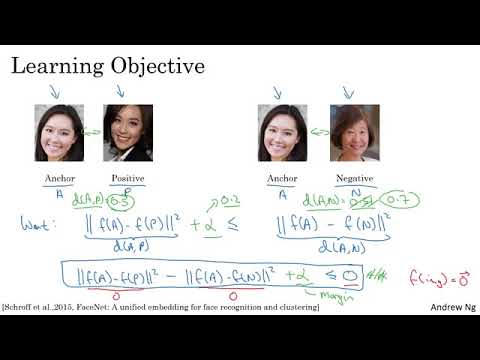

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('LN3RdUFPYyI', 800,400)

## Concept of Triplet loss
References : https://omoindrot.github.io/triplet-loss

It’s a loss function that is used when training a NN for face recognition/verification. Each training sample is actually composed of a “triplet” of images:
* **An anchor**
* **A positive of the same class as the anchor**
* **A negative of a different class**

![](https://omoindrot.github.io/assets/triplet_loss/triplet_loss.png)

Source: [Triplet Loss and Online Triplet Mining in TensorFlow](https://omoindrot.github.io/assets/triplet_loss/triplet_loss.png)
1. The CNN first encodes the triplets as embeddings in some vector space.
1. You then calculate the two distances in the embedding space:
    1. The distance between the anchor and the positive - call it d(a,p)
    1. The distance between the anchor and the negative - call it d(a,n)
1. You define some margin of your choice

The triplet loss is then defined as: L=max(d(a,p)−d(a,n)+margin,0)
Minimizing it both pushes d(a,p) to 0, and d(a,n) to be bigger than d(a,p)+margin.

### Triplet mining

Based on the definition of the loss, there are three categories of triplets:

* **easy triplets:**  triplets which have a loss of $0$, because $d(a, p) + margin < d(a,n)$
* **hard triplets:** triplets where the negative is closer to the anchor than the positive, i.e. $d(a,n) < d(a,p)$
* **semi-hard triplets:** triplets where the negative is not closer to the anchor than the positive, but which still have positive loss: $d(a, p) < d(a, n) < d(a, p) + margin$

Each of these definitions depend on where the negative is, relatively to the anchor and positive. We can therefore extend these three categories to the negatives: hard negatives, semi-hard negatives or easy negatives.

The figure below shows the three corresponding regions of the embedding space for the negative.

![](https://omoindrot.github.io/assets/triplet_loss/triplets.png)


In [5]:
def triplet_loss(inputs, dist='sqeuclidean', margin='maxplus'):
    anchor, positive, negative = inputs
    positive_distance = K.square(anchor - positive)
    negative_distance = K.square(anchor - negative)
    if dist == 'euclidean':
        positive_distance = K.sqrt(K.sum(positive_distance, axis=-1, keepdims=True))
        negative_distance = K.sqrt(K.sum(negative_distance, axis=-1, keepdims=True))
    elif dist == 'sqeuclidean':
        positive_distance = K.sum(positive_distance, axis=-1, keepdims=True)
        negative_distance = K.sum(negative_distance, axis=-1, keepdims=True)
    loss = positive_distance - negative_distance
    if margin == 'maxplus':
        loss = K.maximum(0.0, 1 + loss)
    elif margin == 'softplus':
        loss = K.log(1 + K.exp(loss))
    return K.mean(loss)

def triplet_loss_np(inputs, dist='sqeuclidean', margin='maxplus'):
    anchor, positive, negative = inputs
    positive_distance = np.square(anchor - positive)
    negative_distance = np.square(anchor - negative)
    if dist == 'euclidean':
        positive_distance = np.sqrt(np.sum(positive_distance, axis=-1, keepdims=True))
        negative_distance = np.sqrt(np.sum(negative_distance, axis=-1, keepdims=True))
    elif dist == 'sqeuclidean':
        positive_distance = np.sum(positive_distance, axis=-1, keepdims=True)
        negative_distance = np.sum(negative_distance, axis=-1, keepdims=True)
    loss = positive_distance - negative_distance
    if margin == 'maxplus':
        loss = np.maximum(0.0, 1 + loss)
    elif margin == 'softplus':
        loss = np.log(1 + np.exp(loss))
    return np.mean(loss)

def check_loss():
    batch_size = 10
    shape = (batch_size, 4096)

    p1 = normalize(np.random.random(shape))
    n = normalize(np.random.random(shape))
    p2 = normalize(np.random.random(shape))
    
    input_tensor = [K.variable(p1), K.variable(n), K.variable(p2)]
    out1 = K.eval(triplet_loss(input_tensor))
    input_np = [p1, n, p2]
    out2 = triplet_loss_np(input_np)

    assert out1.shape == out2.shape
    print(np.linalg.norm(out1))
    print(np.linalg.norm(out2))
    print(np.linalg.norm(out1-out2))

In [6]:
check_loss()

1.0032332
1.0032331065187092
8.783248706123459e-08


## 9.Model Design

In [7]:
def GetModel():
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='max')
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    x = Dropout(0.6)(x)
    x = Dense(embedding_dim)(x)
    x = Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)
    embedding_model = Model(base_model.input, x, name="embedding")

    input_shape = (image_size, image_size, 3)
    anchor_input = Input(input_shape, name='anchor_input')
    positive_input = Input(input_shape, name='positive_input')
    negative_input = Input(input_shape, name='negative_input')
    anchor_embedding = embedding_model(anchor_input)
    positive_embedding = embedding_model(positive_input)
    negative_embedding = embedding_model(negative_input)

    inputs = [anchor_input, positive_input, negative_input]
    outputs = [anchor_embedding, positive_embedding, negative_embedding]
       
    triplet_model = Model(inputs, outputs)
    triplet_model.add_loss(K.mean(triplet_loss(outputs)))

    return embedding_model, triplet_model

In [8]:
data = pd.read_csv(path_csv)
train, test = train_test_split(data, train_size=0.7, random_state=1337)
file_id_mapping_train = {k: v for k, v in zip(train.Image.values, train.Id.values)}
file_id_mapping_test = {k: v for k, v in zip(test.Image.values, test.Id.values)}
gen_tr = gen(sample_gen(file_id_mapping_train))
gen_te = gen(sample_gen(file_id_mapping_test))

checkpoint = ModelCheckpoint(path_model, monitor='loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor="val_loss", mode="min", patience=2)
callbacks_list = [checkpoint, early]  # early

In [ ]:
def ShowImg(img):
    plt.figure(figsize=(15,8))
    plt.imshow(img.astype('uint8'))
    plt.show()
    plt.close()
    
batch = next(gen_tr)

img = batch[0]['anchor_input'][0]
print(img.shape)
mean = [103.939, 116.779, 123.68]
img[..., 0] += mean[0]
img[..., 1] += mean[1]
img[..., 2] += mean[2]
img = img[..., ::-1]
ShowImg(img)

# Installation of Resnet 50 Weight to keras

In [ ]:
embedding_model, triplet_model = GetModel()

In [ ]:
for i, layer in enumerate(embedding_model.layers):
    print(i, layer.name, layer.trainable)

In [ ]:
for layer in embedding_model.layers[178:]:
    layer.trainable = True
for layer in embedding_model.layers[:178]:
    layer.trainable = False

In [ ]:
triplet_model.compile(loss=None, optimizer=Adam(0.01))
history = triplet_model.fit_generator(gen_tr, 
                              validation_data=gen_te, 
                              epochs=4, 
                              verbose=1, 
                              workers=4,
                              steps_per_epoch=200, 
                              validation_steps=20,use_multiprocessing=True)

In [ ]:
# plt.plot(history.history['loss'], label='loss')
# plt.legend()
# plt.show()
def eva_plot(History, epoch):
    plt.figure(figsize=(20,10))
#     sns.lineplot(range(1, epoch+1), History.history['acc'], label='Train Accuracy')
#     sns.lineplot(range(1, epoch+1), History.history['val_acc'], label='Test Accuracy')
#     plt.legend(['train', 'validaiton'], loc='upper left')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.show()
    plt.figure(figsize=(20,10))
    sns.lineplot(range(1, epoch+1), History.history['loss'], label='Train loss')
    sns.lineplot(range(1, epoch+1), History.history['val_loss'], label='Test loss')
    plt.legend(['train', 'validaiton'], loc='upper left')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title("Loss Graph")
    plt.show()
    
eva_plot(history, 4)

In [ ]:
for layer in embedding_model.layers[150:]:
    layer.trainable = True
for layer in embedding_model.layers[:150]:
    layer.trainable = False
triplet_model.compile(loss=None, optimizer=Adam(0.0001))

history = triplet_model.fit_generator(gen_tr, 
                                    validation_data=gen_te, 
                                    epochs=3, 
                                    verbose=1, 
                                    workers=4,
                                    steps_per_epoch=70, 
                                    validation_steps=30, use_multiprocessing=True)

In [ ]:
eva_plot(history, 3)

In [ ]:
def data_generator(fpaths, batch=16):
    i = 0
    imgs = []
    fnames = []
    for path in fpaths:
        if i == 0:
            imgs = []
            fnames = []
        i += 1
        img = read_and_resize(path)
        imgs.append(img)
        fnames.append(os.path.basename(path))
        if i == batch:
            i = 0
            imgs = np.array(imgs)
            yield fnames, imgs
            
    if i != 0:
        imgs = np.array(imgs)
        yield fnames, imgs
        
    raise StopIteration()

In [ ]:
data = pd.read_csv(path_csv)
file_id_mapping = {k: v for k, v in zip(data.Image.values, data.Id.values)}
import glob
train_files = glob.glob(join(path_train, '*.jpg'))
test_files = glob.glob(join(path_test, '*.jpg'))

In [ ]:
train_preds  = []
train_file_names = []
for fnames, imgs in tqdm(data_generator(train_files, batch=32)):
    predicts = embedding_model.predict(imgs)
    predicts = predicts.tolist()
    train_preds += predicts
    train_file_names += fnames
train_preds = np.array(train_preds)

In [ ]:
test_preds = []
test_file_names = []
for fnames, imgs in tqdm(data_generator(test_files, batch=32)) :
    predicts = embedding_model.predict(imgs)
    predicts = predicts.tolist()
    test_preds += predicts
    test_file_names += fnames
test_preds = np.array(test_preds)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=6)
neigh.fit(train_preds)

In [ ]:
distances_test, neighbors_test = neigh.kneighbors(test_preds)
distances_test, neighbors_test = distances_test.tolist(), neighbors_test.tolist()

In [ ]:
preds_str = []

for filepath, distance, neighbour_ in zip(test_file_names, distances_test, neighbors_test):
    sample_result = []
    sample_classes = []
    for d, n in zip(distance, neighbour_):
        train_file = train_files[n].split(os.sep)[-1]
        class_train = file_id_mapping[train_file]
        sample_classes.append(class_train)
        sample_result.append((class_train, d))

    if "new_whale" not in sample_classes:
        sample_result.append(("new_whale", 0.1))
    sample_result.sort(key=lambda x: x[1])
    sample_result = sample_result[:5]
    preds_str.append(" ".join([x[0] for x in sample_result]))

In [ ]:
preds_str

In [ ]:
df = pd.DataFrame(preds_str, columns=["Id"])
df['Image'] = [x.split(os.sep)[-1] for x in test_file_names]
df.to_csv("sub_humpback.csv", index=False)